In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_path = '/content/drive/MyDrive/Portfólio - Dados/Datasets/website_wata.csv'
df = pd.read_csv(dataset_path)

In [4]:
print (df)

      Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0              5         11.051381     0.230652        Organic      3.890460   
1              4          3.429316     0.391001         Social      8.478174   
2              4          1.621052     0.397986        Organic      9.636170   
3              5          3.629279     0.180458        Organic      2.071925   
4              5          4.235843     0.291541           Paid      1.960654   
...          ...               ...          ...            ...           ...   
1995           1          2.724513     0.207187       Referral      1.324206   
1996           3          0.392856     0.095559        Organic      3.824416   
1997           4          9.899823     0.446622        Organic      1.288675   
1998           3          0.393319     0.278340           Paid      5.037584   
1999           3          0.882638     0.338026         Direct      5.186908   

      Previous Visits  Conversion Rate 

# **Análise Exploratória de Dados (EDA)**

A Análise Exploratória de Dados (EDA) é o primeiro passo para entendermos a estrutura, a distribuição e os relacionamentos entre os dados. O objetivo principal é identificar padrões, outliers, variáveis importantes e possíveis anomalias. Nesta análise, utilizamos bibliotecas populares como ***Matplotlib*** e ***Seaborn*** para visualização de dados.

# **1. Histograma de Page Views**

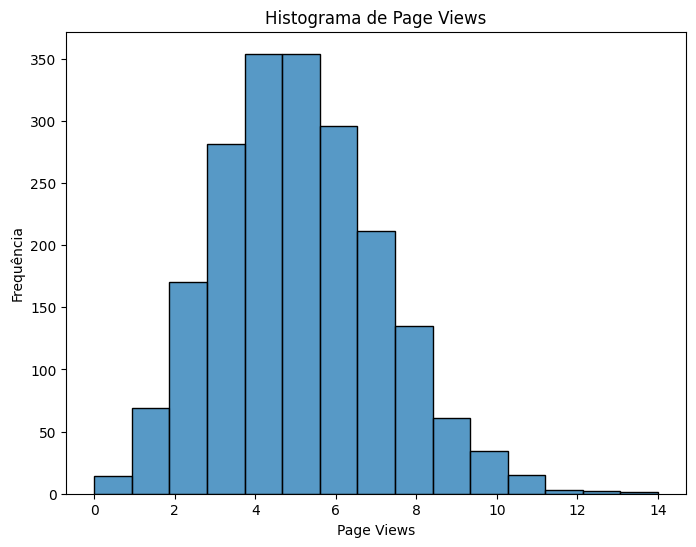

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Page Views'], bins=15)
plt.title('Histograma de Page Views')
plt.xlabel('Page Views')
plt.ylabel('Frequência')
plt.show()

Este histograma mostra a distribuição da variável **Page Views**. Isso ajuda a visualizar quantas vezes cada faixa de visualizações de página aparece no dataset. O objetivo é entender a frequência de acessos às páginas e detectar possíveis concentrações em certos valores.

# **2. Histograma de Session Duration**

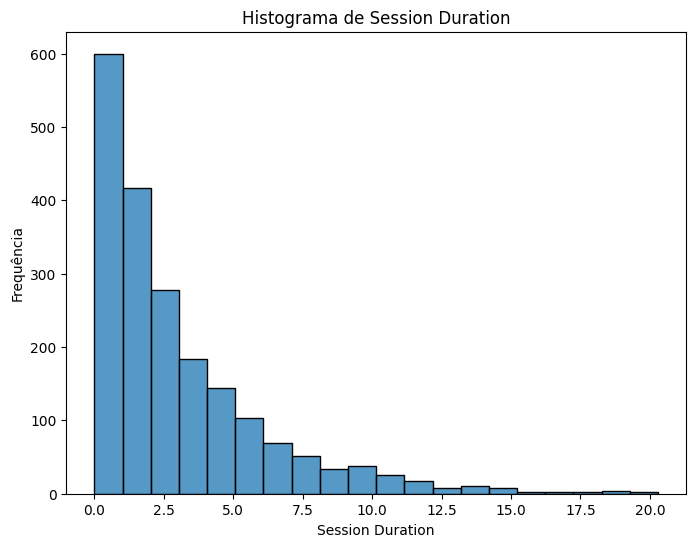

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Session Duration'], bins=20)
plt.title('Histograma de Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Frequência')
plt.show()

Este gráfico mostra a distribuição do **tempo de sessão dos usuários** no site. Pode ser útil para identificar sessões mais longas ou curtas, além de possíveis padrões de navegação.

# **3. Diagrama de Pareto para Session Duration**

In [7]:
# Criando um novo histograma para armazenar os valores de Session Duration
hist, bin_edges = np.histogram(df['Session Duration'], bins=20)

# Criando um novo dataFrame a partir dos dados do histograma criado
df_hist = pd.DataFrame({'Session Duration': bin_edges[:-1], 'Frequência': hist})

In [8]:
# Calculando a frequência cumulativa para cada intervalo de duração da sessão.
df_hist['Frequência_Cumulativa'] = df_hist['Frequência'].cumsum()

# Calcula a porcentagem cumulativa da frequência para cada intervalo.
df_hist['Porcentagem_Cumulativa'] = df_hist['Frequência_Cumulativa'] / df_hist['Frequência'].sum() * 100

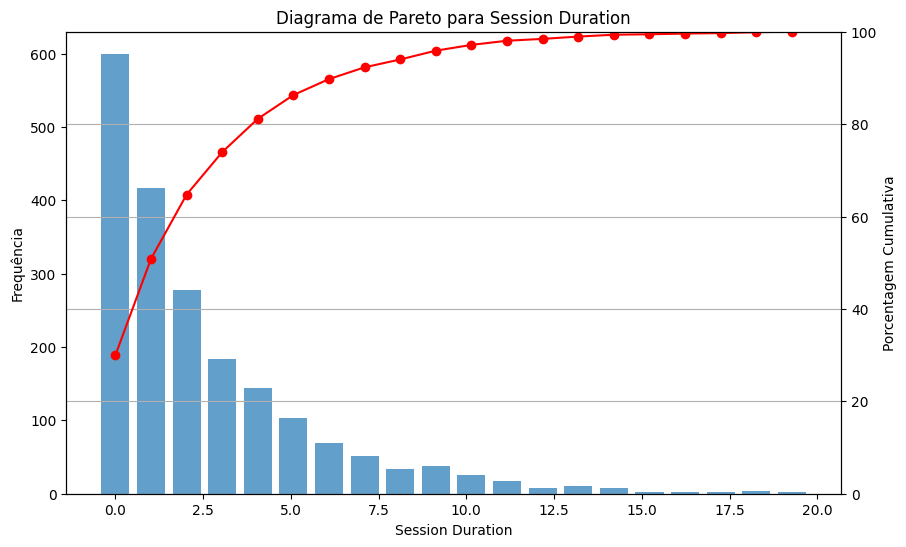

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Histograma
ax1.bar(df_hist['Session Duration'], df_hist['Frequência'], align='center', alpha=0.7)
ax1.set_xlabel('Session Duration')
ax1.set_ylabel('Frequência')

# Plot do Eixo secundário para o gráfico de Pareto
ax2 = ax1.twinx()
ax2.plot(df_hist['Session Duration'], df_hist['Porcentagem_Cumulativa'], color='red', marker='o')
ax2.set_ylabel('Porcentagem Cumulativa')
ax2.set_ylim([0, 100])

plt.title('Diagrama de Pareto para Session Duration')
plt.grid(True)
plt.show()

O **Diagrama de Pareto** é uma ferramenta estatística que visualiza a importância relativa de diferentes categorias, seguindo o princípio de Pareto, que afirma que, para muitos fenômenos, aproximadamente **80%** dos efeitos vêm de **20%** das causas. No contexto da análise de dados, o Diagrama de Pareto pode ser usado para identificar quais intervalos de dados ***(neste caso, a duração das sessões***) são mais significativos.

***No gráfico gerado:***

1.   O histograma mostra a frequência absoluta das sessões em diferentes intervalos de duração.
2.   A linha vermelha representa a porcentagem cumulativa da frequência, permitindo identificar rapidamente quais intervalos contribuem mais para a maioria das sessões.

Esse tipo de análise é útil para priorizar ações com base na importância relativa das categorias, ajudando a focar nas áreas que terão o maior impacto.

# **4. Histograma de Bounce Rate**

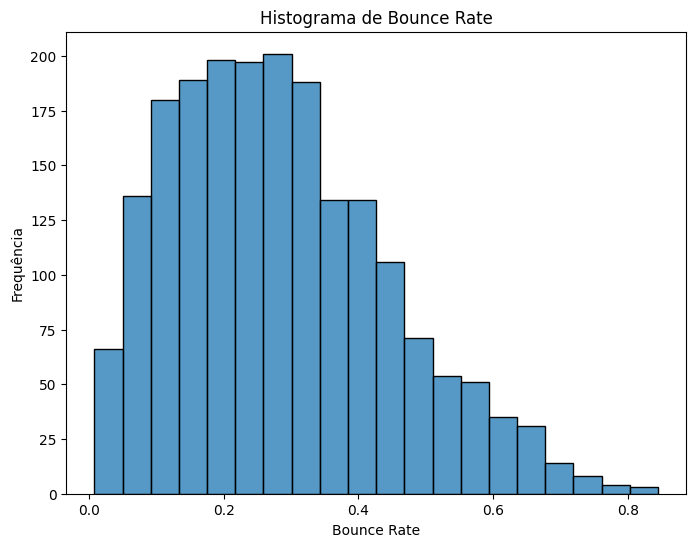

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Bounce Rate'], bins=20)
plt.title('Histograma de Bounce Rate')
plt.xlabel('Bounce Rate')
plt.ylabel('Frequência')
plt.show()

Aqui visualizamos ***a distribuição da taxa de rejeição*** (**Bounce Rate**), que indica a porcentagem de usuários que saíram do site após visualizar uma única página. Um alto Bounce Rate pode indicar problemas de engajamento.

# **5. Boxplot de Session Duration por Traffic Source**

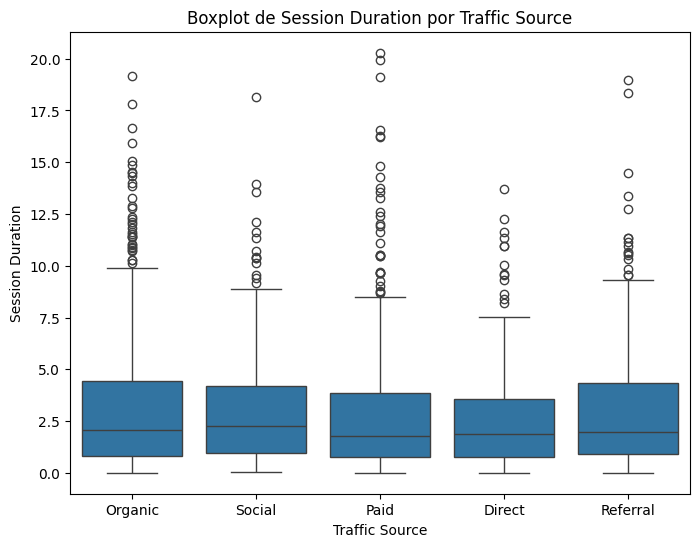

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Traffic Source', y='Session Duration', data=df)
plt.title('Boxplot de Session Duration por Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Session Duration')
plt.show()

Este boxplot compara a duração das **sessões dos usuários** de acordo com a **fonte de tráfego** (***Traffic Source***). Ele ajuda a identificar como diferentes fontes (por exemplo, orgânica, paga, direta) afetam o tempo de navegação.

# **6. Boxplot de Bounce Rate por Traffic Source**

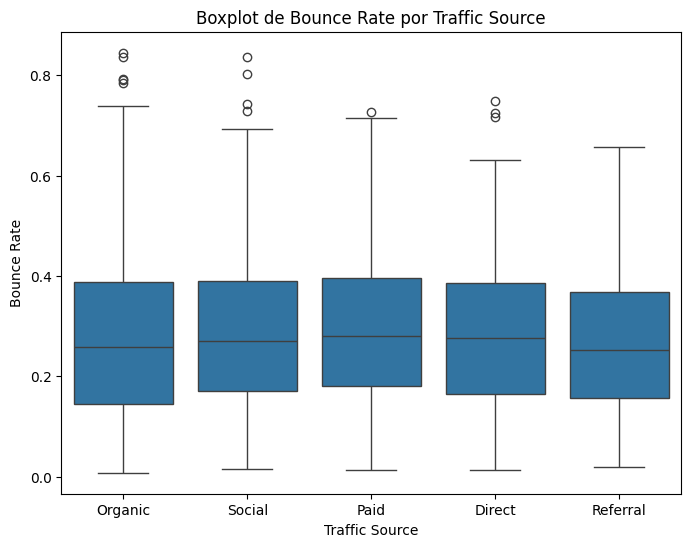

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Traffic Source', y='Bounce Rate', data=df)
plt.title('Boxplot de Bounce Rate por Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Bounce Rate')
plt.show()

Já este boxplot compara a **taxa de rejeição por fonte de tráfego**. Ajuda a identificar se os usuários de uma determinada fonte tendem a sair do site mais rapidamente, o que pode indicar a qualidade do tráfego.

# **7. Scatter plot de Session Duration vs Bounce Rate**

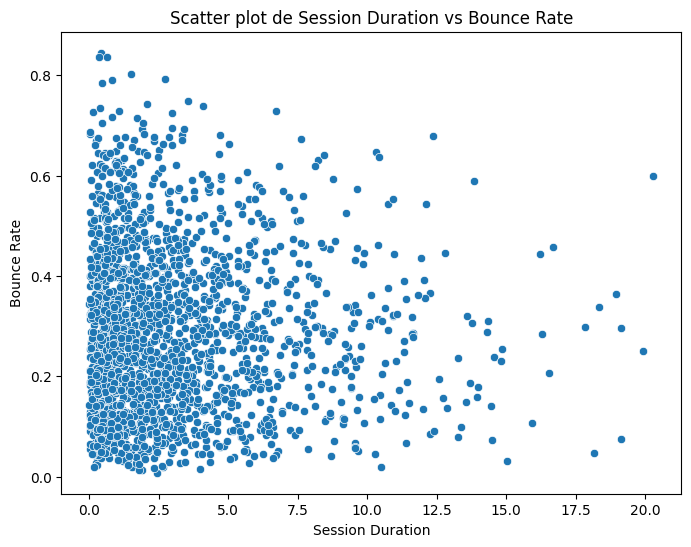

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Session Duration', y='Bounce Rate', data=df)
plt.title('Scatter plot de Session Duration vs Bounce Rate')
plt.xlabel('Session Duration')
plt.ylabel('Bounce Rate')
plt.show()

Este **gráfico de dispersão** mostra a relação entre a duração da sessão e a taxa de rejeição. Isso ajuda a entender se existe alguma correlação entre o tempo de permanência no site e a probabilidade de um usuário sair sem interagir.

# **8. Scatter plot de Page Views vs Conversion Rate**

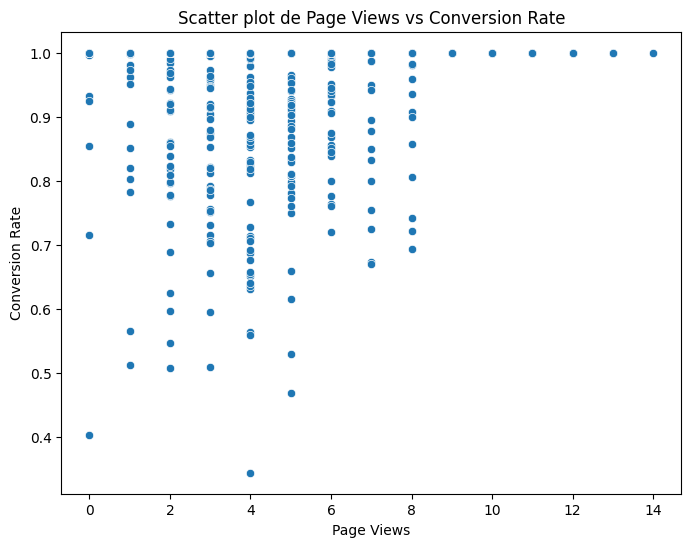

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Page Views', y='Conversion Rate', data=df)
plt.title('Scatter plot de Page Views vs Conversion Rate')
plt.xlabel('Page Views')
plt.ylabel('Conversion Rate')
plt.show()

Este gráfico mostra a relação entre o **número de visualizações de página e a taxa de conversão**. Pode ajudar a identificar se mais visualizações de página estão associadas a uma maior taxa de conversão.

# **9. Matriz de Correlação**

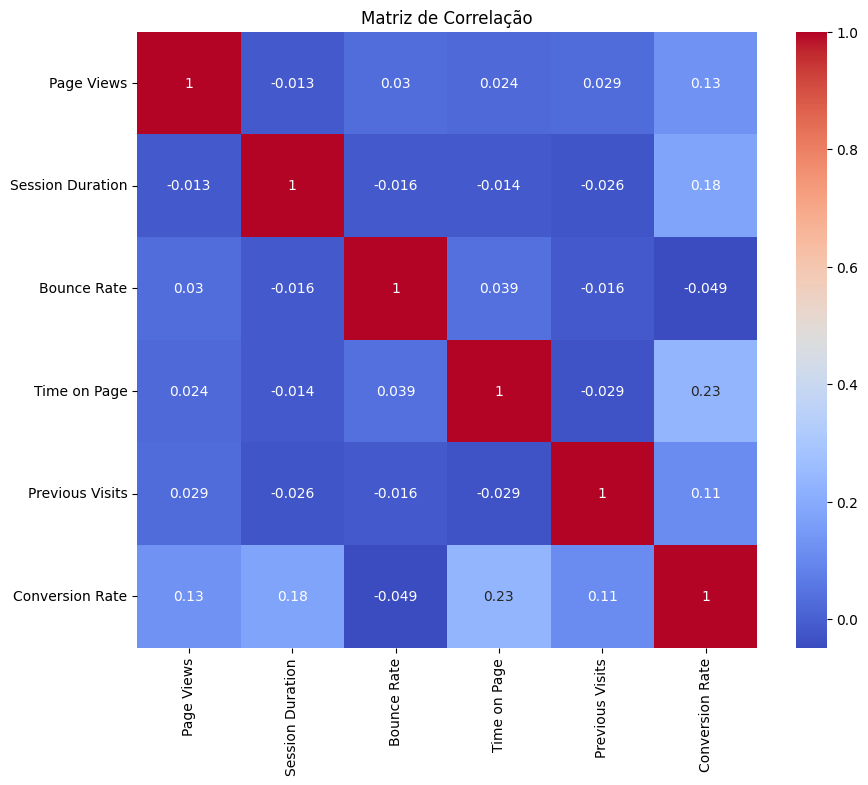

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

A matriz de correlação visualiza as relações entre todas as variáveis numéricas do dataset. O gráfico mostra a força e a direção das correlações entre as variáveis, com cores que indicam correlações positivas (mais próximas de 1) ou negativas (mais próximas de -1). Isso ajuda a identificar possíveis relações importantes entre os dados.

# **Conclusão**

Esta análise EDA oferece uma visão inicial do comportamento dos usuários com base nas variáveis de tráfego e engajamento no site. Identificar padrões, outliers e correlações é crucial para entender melhor os dados e tomar decisões baseadas em insights. Esses gráficos fornecem uma base sólida para avançar para modelagens mais complexas ou otimizações de campanhas de marketing, por exemplo.